In [241]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df = pd.read_csv('brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


91.85

In [152]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [154]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 428.2+ KB


In [155]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,0,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,1,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


<AxesSubplot:xlabel='gender'>

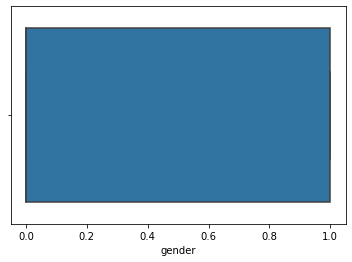

In [156]:
sns.boxplot(x = df['gender'])

<AxesSubplot:xlabel='heart_disease'>

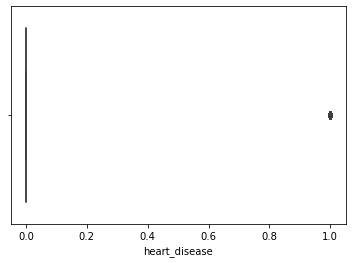

In [157]:
sns.boxplot(x = df['heart_disease'])

<AxesSubplot:>

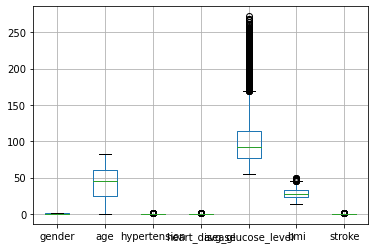

In [158]:
df.boxplot()

In [244]:
q1 = df['avg_glucose_level'].quantile(0.25)
print(q1)
q2 = df['avg_glucose_level'].quantile(0.50)
print(q2)
q3 = df['avg_glucose_level'].quantile(0.75)
print(q3)

iqr = q3 - q1
print(iqr)

lower_tail = q1 + 1.5*iqr
print(lower_tail)

uppar_tail = q3 + 1.5*iqr
print(uppar_tail)

77.23
91.85
113.86
36.629999999999995
132.175
168.805


<AxesSubplot:xlabel='avg_glucose_level'>

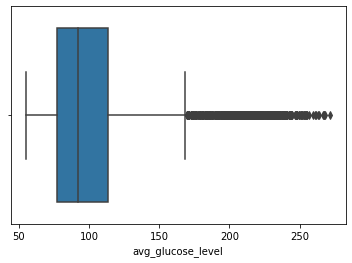

In [160]:
sns.boxplot(x = df['avg_glucose_level'])

In [247]:
np.median(np.where(df['avg_glucose_level'] > uppar_tail))

2323.0

In [161]:
df['avg_glucose_level'] = np.where(df['avg_glucose_level'] > uppar_tail,126,df['avg_glucose_level'])

In [162]:
df['avg_glucose_level'].to_dict()

{0: 126.0,
 1: 105.92,
 2: 126.0,
 3: 126.0,
 4: 126.0,
 5: 70.09,
 6: 94.39,
 7: 58.57,
 8: 80.43,
 9: 120.46,
 10: 104.51,
 11: 126.0,
 12: 167.41,
 13: 126.0,
 14: 126.0,
 15: 89.22,
 16: 126.0,
 17: 126.0,
 18: 126.0,
 19: 126.0,
 20: 102.87,
 21: 104.12,
 22: 100.98,
 23: 126.0,
 24: 126.0,
 25: 83.41,
 26: 126.0,
 27: 126.0,
 28: 84.2,
 29: 84.03,
 30: 126.0,
 31: 74.63,
 32: 92.62,
 33: 60.91,
 34: 78.03,
 35: 71.22,
 36: 144.9,
 37: 126.0,
 38: 126.0,
 39: 107.26,
 40: 99.33,
 41: 58.09,
 42: 127.29,
 43: 124.13,
 44: 126.0,
 45: 59.32,
 46: 126.0,
 47: 126.0,
 48: 126.0,
 49: 74.9,
 50: 61.94,
 51: 93.72,
 52: 113.01,
 53: 126.0,
 54: 104.47,
 55: 86.23,
 56: 72.67,
 57: 126.0,
 58: 116.55,
 59: 126.0,
 60: 96.59,
 61: 66.72,
 62: 126.0,
 63: 110.85,
 64: 143.43,
 65: 96.16,
 66: 88.92,
 67: 79.79,
 68: 96.97,
 69: 111.81,
 70: 59.35,
 71: 86.94,
 72: 98.55,
 73: 126.0,
 74: 72.81,
 75: 68.02,
 76: 68.56,
 77: 64.14,
 78: 126.0,
 79: 76.34,
 80: 126.0,
 81: 78.92,
 82: 82.81,


<AxesSubplot:xlabel='avg_glucose_level'>

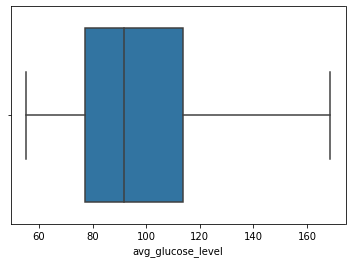

In [163]:
sns.boxplot(x = df['avg_glucose_level'])

<AxesSubplot:>

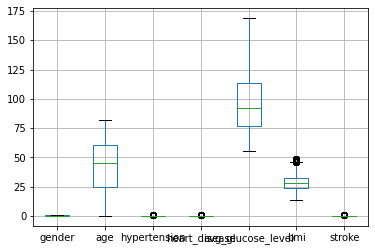

In [164]:
df.boxplot()

<AxesSubplot:xlabel='avg_glucose_level'>

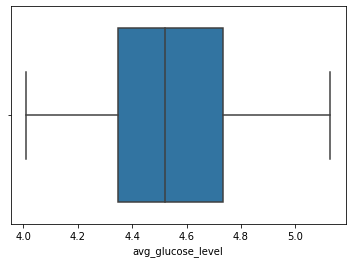

In [165]:
sns.boxplot(x = np.log(df['avg_glucose_level']))

<AxesSubplot:>

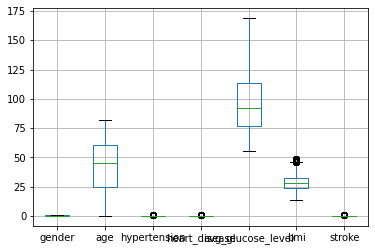

In [166]:
df.boxplot()

In [167]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,126.00,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,126.00,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,126.00,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,126.00,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,Yes,Private,Urban,126.00,31.1,smokes,0
4978,0,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,1,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [168]:
df['ever_married'].value_counts().to_dict()

{'Yes': 3280, 'No': 1701}

In [169]:
df['ever_married'] = df['ever_married'].replace({'Yes': 0, 'No': 1})

In [170]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,Private,Urban,126.00,36.6,formerly smoked,1
1,1,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,0,Private,Urban,126.00,34.4,smokes,1
3,0,79.0,1,0,0,Self-employed,Rural,126.00,24.0,never smoked,1
4,1,81.0,0,0,0,Private,Urban,126.00,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,Private,Rural,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,0,Private,Urban,126.00,31.1,smokes,0
4978,0,45.0,1,0,0,Govt_job,Rural,95.02,31.8,smokes,0
4979,1,40.0,0,0,0,Private,Rural,83.94,30.0,smokes,0


In [171]:
df['work_type'].value_counts().to_dict()

{'Private': 2860, 'Self-employed': 804, 'children': 673, 'Govt_job': 644}

In [172]:
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 3, 'Govt_job': 4})

In [173]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,Urban,126.00,36.6,formerly smoked,1
1,1,80.0,0,1,0,0,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,0,0,Urban,126.00,34.4,smokes,1
3,0,79.0,1,0,0,1,Rural,126.00,24.0,never smoked,1
4,1,81.0,0,0,0,0,Urban,126.00,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,Rural,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,0,0,Urban,126.00,31.1,smokes,0
4978,0,45.0,1,0,0,4,Rural,95.02,31.8,smokes,0
4979,1,40.0,0,0,0,0,Rural,83.94,30.0,smokes,0


In [174]:
df['Residence_type'].value_counts().to_dict()

{'Urban': 2532, 'Rural': 2449}

In [175]:
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

In [176]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,126.00,36.6,formerly smoked,1
1,1,80.0,0,1,0,0,1,105.92,32.5,never smoked,1
2,0,49.0,0,0,0,0,0,126.00,34.4,smokes,1
3,0,79.0,1,0,0,1,1,126.00,24.0,never smoked,1
4,1,81.0,0,0,0,0,0,126.00,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,1,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,0,0,0,126.00,31.1,smokes,0
4978,0,45.0,1,0,0,4,1,95.02,31.8,smokes,0
4979,1,40.0,0,0,0,0,1,83.94,30.0,smokes,0


In [177]:
df['smoking_status'].value_counts().to_dict()

{'never smoked': 1838, 'Unknown': 1500, 'formerly smoked': 867, 'smokes': 776}

In [178]:
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 1, 'Unknown': 2, 'formerly smoked': 3, 'smokes': 4})

In [179]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,126.00,36.6,3,1
1,1,80.0,0,1,0,0,1,105.92,32.5,1,1
2,0,49.0,0,0,0,0,0,126.00,34.4,4,1
3,0,79.0,1,0,0,1,1,126.00,24.0,1,1
4,1,81.0,0,0,0,0,0,126.00,29.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,1,70.15,29.8,3,0
4977,1,40.0,0,0,0,0,0,126.00,31.1,4,0
4978,0,45.0,1,0,0,4,1,95.02,31.8,4,0
4979,1,40.0,0,0,0,0,1,83.94,30.0,4,0


<AxesSubplot:>

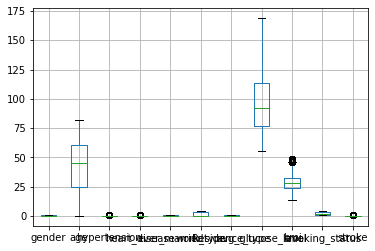

In [180]:
df.boxplot()

In [146]:
q1 = df['bmi'].quantile(0.25)
print(q1)
q2 = df['bmi'].quantile(0.50)
print(q2)
q3 = df['bmi'].quantile(0.75)
print(q3)

iqr = q3 - q1
print(iqr)

lower_tail = q1 + 1.5*iqr
print(lower_tail)

uppar_tail = q3 + 1.5*iqr
print(uppar_tail)

23.7
28.1
32.6
8.900000000000002
37.050000000000004
45.95


<AxesSubplot:xlabel='bmi'>

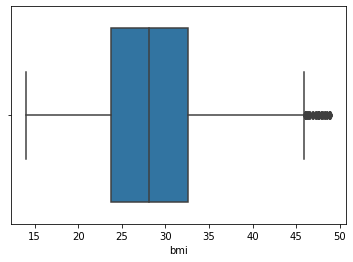

In [181]:
sns.boxplot(x = df['bmi'])

<AxesSubplot:xlabel='bmi'>

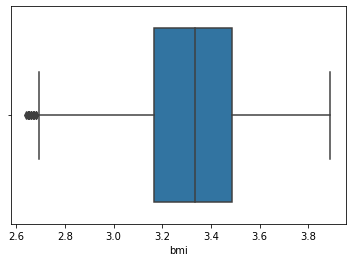

In [183]:
sns.boxplot(x = np.log(df['bmi']))

In [184]:
df['bmi'] = np.log(df['bmi'])

<AxesSubplot:>

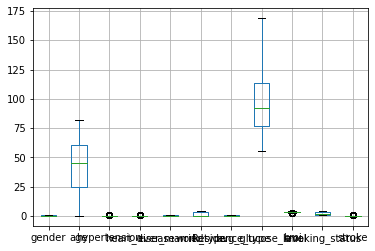

In [185]:
df.boxplot()

In [186]:
df['bmi'] = np.where(df['bmi'] > lower_tail,lower_tail,df['bmi'])

In [187]:
df['bmi'].to_dict()

{0: 3.6000482404073204,
 1: 3.481240089335692,
 2: 3.5380565643793527,
 3: 3.1780538303479458,
 4: 3.367295829986474,
 5: 3.3105430133940246,
 6: 3.126760535960395,
 7: 3.186352633162641,
 8: 3.391147045808654,
 9: 3.6054978451748854,
 10: 3.3068867021909143,
 11: 3.339321977944068,
 12: 3.4307561839036995,
 13: 3.624340932976365,
 14: 3.250374491927572,
 15: 3.632309102625542,
 16: 3.109060958860994,
 17: 3.8897773964808264,
 18: 3.2809112157876537,
 19: 3.481240089335692,
 20: 3.3032169733019514,
 21: 3.1570004211501135,
 22: 3.339321977944068,
 23: 3.342861804649192,
 24: 3.7887247890836524,
 25: 3.2347491740244907,
 26: 3.100092288878234,
 27: 3.417726683613366,
 28: 3.391147045808654,
 29: 3.2771447329921766,
 30: 3.517497837358316,
 31: 3.139832617527748,
 32: 3.4657359027997265,
 33: 3.3978584803966405,
 34: 3.173878458937465,
 35: 3.349904087274605,
 36: 3.2733640101522705,
 37: 3.005682604407159,
 38: 3.5145260669691587,
 39: 3.653252276470785,
 40: 3.517497837358316,
 41: 3.6

<AxesSubplot:xlabel='bmi'>

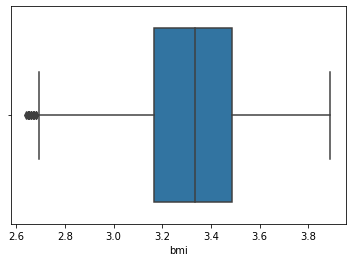

In [188]:
sns.boxplot(x = df['bmi'])

<AxesSubplot:>

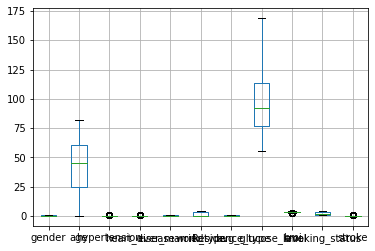

In [189]:
df.boxplot()

In [190]:
x = df.drop('stroke',axis = 1)
y = df.stroke

In [191]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

## Sampling

In [192]:
from imblearn.over_sampling import RandomOverSampler

In [193]:
random_sampling = RandomOverSampler()
x_sample,y_sample = random_sampling.fit_resample(x,y)
x_sample

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,0,0,0,126.00,3.600048,3
1,1,80.0,0,1,0,0,1,105.92,3.481240,1
2,0,49.0,0,0,0,0,0,126.00,3.538057,4
3,0,79.0,1,0,0,1,1,126.00,3.178054,1
4,1,81.0,0,0,0,0,0,126.00,3.367296,3
...,...,...,...,...,...,...,...,...,...,...
9461,0,52.0,0,0,0,0,1,96.59,3.273364,1
9462,0,80.0,1,0,1,0,0,66.03,3.566712,1
9463,0,82.0,1,1,0,4,0,126.00,3.328627,3
9464,0,75.0,0,1,1,1,0,109.78,3.342862,2


In [194]:
y_sample.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.3, random_state=11, stratify = y_sample)

## Model Training

In [196]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

## Model evaluation

In [197]:
## Training

y_train_pred = dt_clf.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3313
           1       1.00      1.00      1.00      3313

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3313    0]
 [   0 3313]]


In [198]:
## testing

y_test_pred = dt_clf.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9707746478873239
classification_report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1337
           1       1.00      0.94      0.97      1503

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1337    0]
 [  83 1420]]


## hyperparameter Tuning

### Randomized searchcv

In [199]:
df_hyp = DecisionTreeClassifier()

hyperparameter = {"criterion" : ['gini','entropy'],
    "max_depth" : np.arange(2,100),
    "min_samples_split" : np.arange(2,100),
    "min_samples_leaf" : np.arange(2,100)}

rd_model = RandomizedSearchCV(df_hyp,hyperparameter,cv = 5)
rd_model.fit(x_train,y_train)
rd_model.best_estimator_

DecisionTreeClassifier(max_depth=35, min_samples_leaf=9, min_samples_split=12)

In [200]:
dt_hyp = rd_model.best_estimator_
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=35, min_samples_leaf=9, min_samples_split=12)

In [201]:
## Training

y_train_pred = dt_hyp.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.947630546332629
classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      3008
           1       0.99      0.91      0.95      3618

    accuracy                           0.95      6626
   macro avg       0.95      0.95      0.95      6626
weighted avg       0.95      0.95      0.95      6626

confusion_matrix : 
 [[2987   21]
 [ 326 3292]]


In [202]:
## testing

y_test_pred = dt_hyp.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9190140845070423
classification_report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1228
           1       0.99      0.87      0.92      1612

    accuracy                           0.92      2840
   macro avg       0.92      0.93      0.92      2840
weighted avg       0.93      0.92      0.92      2840

confusion_matrix : 
 [[1209   19]
 [ 211 1401]]


## Pruning


In [203]:
dt_clf = DecisionTreeClassifier(random_state=13)

In [204]:
ccp_dict = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = ccp_dict['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 9.94015301e-05, 1.43733920e-04, 1.44060588e-04,
       1.45225498e-04, 1.45530594e-04, 1.45530594e-04, 1.46052209e-04,
       1.46204347e-04, 1.46841680e-04, 1.47327268e-04, 1.47961388e-04,
       1.48318536e-04, 1.48362639e-04, 1.48633940e-04, 1.49145079e-04,
       1.49165725e-04, 1.49348526e-04, 1.49348526e-04, 1.49396165e-04,
       1.49810905e-04, 2.58721056e-04, 2.61955069e-04, 2.62470636e-04,
       2.63067160e-04, 2.68303317e-04, 2.71657108e-04, 2.73847891e-04,
       2.74314830e-04, 2.74401120e-04, 2.74686954e-04, 2.77693933e-04,
       2.78226341e-04, 2.79172430e-04, 2.80058875e-04, 2.80949673e-04,
       2.81024595e-04, 2.81718483e-04, 2.82132232e-04, 2.83730758e-04,
       2.83910069e-04, 2.83984178e-04, 2.84085865e-04, 2.85954851e-04,
       2.86749170e-04, 2.90231953e-04, 2.91256020e-04, 2.91353178e-04,
       2.91473256e-04, 2.92104418e-04, 2.92694528e-04, 2.93217196e-04,
       2.93486011e-04, 2.94479250e-04, 2.94654536e-04, 2.94654536e-04,
      

In [205]:
r2_score_train_list = []
r2_score_test_list =  []

for ccp in ccp_alphas:
    dt_clf_pruning = DecisionTreeClassifier(random_state=15,ccp_alpha=ccp)
    dt_clf_pruning.fit(x_train,y_train)
    r2_score_train = dt_clf_pruning.score(x_train,y_train)
    r2_score_test = dt_clf_pruning.score(x_test,y_test)
    r2_score_train_list.append(r2_score_train)
    r2_score_test_list.append(r2_score_test)
    print(ccp,r2_score_train,r2_score_test)

0.0 1.0 0.9725352112676057
9.940153005623447e-05 0.9998490793842438 0.9725352112676057
0.00014373391976772604 0.9996981587684878 0.9725352112676057
0.00014406058776719817 0.9995472381527316 0.9725352112676057
0.00014522549818040987 0.9992453969212194 0.9725352112676057
0.00014553059376482254 0.9990944763054633 0.9725352112676057
0.0001455305937648227 0.9989435556897072 0.9725352112676057
0.0001460522087962376 0.9987926350739511 0.9725352112676057
0.0001462043465137338 0.9986417144581949 0.971830985915493
0.00014684168019513642 0.9984907938424389 0.9714788732394366
0.00014732726776191908 0.9983398732266827 0.9711267605633803
0.0001479613879961887 0.9981889526109267 0.9711267605633803
0.00014831853617411057 0.9980380319951705 0.9707746478873239
0.00014836263921787316 0.9978871113794144 0.9704225352112676
0.0001486339397598073 0.9977361907636583 0.969718309859155
0.0001491450791001579 0.9975852701479022 0.969718309859155
0.00014916572487522745 0.997434349532146 0.9693661971830986
0.000149

0.001658950768519136 0.8854512526411108 0.8598591549295774
0.0016675772193261483 0.8836402052520375 0.8588028169014085
0.0017607405171546435 0.8825837609417446 0.8584507042253521
0.0018089834937268588 0.8807727135526713 0.8570422535211267
0.0019267151301251835 0.8751886507696951 0.8517605633802817
0.001937370000099832 0.8677935405976457 0.842605633802817
0.001946571053121007 0.8664352550558406 0.8433098591549296
0.0019788492648587556 0.8552671294898884 0.8362676056338029
0.0020391923199046653 0.8539088439480833 0.8355633802816902
0.0020796682674992122 0.8424388771506188 0.8299295774647887
0.002159781306943418 0.8401750679142771 0.827112676056338
0.002168389258087124 0.8380621792936915 0.826056338028169
0.0022589755585771722 0.8347419257470571 0.821830985915493
0.002267566995874236 0.8315725928161787 0.8179577464788732
0.0022870075562858457 0.8190461817084214 0.8084507042253521
0.0023518462621994166 0.8164805312405674 0.8056338028169014
0.0025618404730991494 0.8140658013884696 0.8017605

In [206]:
max(r2_score_test_list)

0.9725352112676057

In [207]:
np.where(r2_score_test_list == max(r2_score_test_list))

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),)

In [208]:
np.where(r2_score_test_list  == max(r2_score_test_list))

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),)

In [209]:
r2_score_train_list[1]

0.9998490793842438

In [210]:
ccp_alphas[1]

9.940153005623447e-05

In [212]:
dt_clf_after_prun = DecisionTreeClassifier(random_state=16,ccp_alpha=9.940153005623447e-05)
dt_clf_after_prun.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=9.940153005623447e-05, random_state=16)

In [213]:
## Training

y_train_pred = dt_clf_after_prun.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.9998490793842438
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3312
           1       1.00      1.00      1.00      3314

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3312    0]
 [   1 3313]]


In [214]:
## testing

y_test_pred = dt_clf_after_prun.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9721830985915493
classification_report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1341
           1       1.00      0.95      0.97      1499

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1341    0]
 [  79 1420]]


In [215]:
dt_clf_after_prun.feature_importances_

array([0.00688359, 0.44207165, 0.01386832, 0.01313688, 0.00644299,
       0.01860146, 0.01021277, 0.22792605, 0.21523355, 0.04562274])

In [216]:
df1 = df[['age','avg_glucose_level','bmi']]
df1['stroke'] = df['stroke']
 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11392\3548273936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stroke'] = df['stroke']


In [217]:
df1

,age,avg_glucose_level,bmi,stroke
0,67.0,126.00,3.600048,1
1,80.0,105.92,3.481240,1
2,49.0,126.00,3.538057,1
3,79.0,126.00,3.178054,1
4,81.0,126.00,3.367296,1
...,...,...,...,...
4976,41.0,70.15,3.394508,0
4977,40.0,126.00,3.437208,0
4978,45.0,95.02,3.459466,0
4979,40.0,83.94,3.401197,0


In [218]:
x = df1.drop('stroke',axis = 1)
y = df1.stroke

In [219]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

## Sampling

In [220]:
from imblearn.over_sampling import RandomOverSampler

In [221]:
random_sampling = RandomOverSampler()
x_sample,y_sample = random_sampling.fit_resample(x,y)
x_sample

,age,avg_glucose_level,bmi
0,67.0,126.00,3.600048
1,80.0,105.92,3.481240
2,49.0,126.00,3.538057
3,79.0,126.00,3.178054
4,81.0,126.00,3.367296
...,...,...,...
9461,80.0,91.02,3.493473
9462,69.0,94.39,3.126761
9463,79.0,126.00,3.339322
9464,63.0,126.00,3.424263


In [222]:
y_sample.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.3, random_state=11, stratify = y_sample)

## Model Training

In [224]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

## Model evaluation

In [225]:
## Training

y_train_pred = dt_clf.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.9995472381527316
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3310
           1       1.00      1.00      1.00      3316

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3310    0]
 [   3 3313]]


In [226]:
## testing

y_test_pred = dt_clf.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9651408450704225
classification_report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1321
           1       1.00      0.93      0.97      1519

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1321    0]
 [  99 1420]]


## hyperparameter Tuning

### Randomized searchcv

In [227]:
df_hyp = DecisionTreeClassifier()

hyperparameter = {"criterion" : ['gini','entropy'],
    "max_depth" : np.arange(2,100),
    "min_samples_split" : np.arange(2,100),
    "min_samples_leaf" : np.arange(2,100)}

rd_model = RandomizedSearchCV(df_hyp,hyperparameter,cv = 5)
rd_model.fit(x_train,y_train)
rd_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=9,
                       min_samples_split=15)

In [228]:
dt_hyp = rd_model.best_estimator_
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=9,
                       min_samples_split=15)

In [229]:
## Training

y_train_pred = dt_hyp.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.9424992453969212
classification_report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2980
           1       0.99      0.90      0.95      3646

    accuracy                           0.94      6626
   macro avg       0.94      0.95      0.94      6626
weighted avg       0.95      0.94      0.94      6626

confusion_matrix : 
 [[2956   24]
 [ 357 3289]]


In [85]:
## testing

y_test_pred = dt_hyp.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.8742957746478873
classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1235
           1       0.94      0.83      0.88      1605

    accuracy                           0.87      2840
   macro avg       0.87      0.88      0.87      2840
weighted avg       0.88      0.87      0.87      2840

confusion_matrix : 
 [[1149   86]
 [ 271 1334]]


## Pruning


In [230]:
dt_clf = DecisionTreeClassifier(random_state=13)

In [87]:
ccp_dict = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = ccp_dict['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 8.69968462e-06, 1.43165802e-05, 1.41166639e-04,
       1.44105645e-04, 1.44358850e-04, 1.44358850e-04, 1.44632257e-04,
       1.44632257e-04, 1.44632257e-04, 1.45330963e-04, 1.46052209e-04,
       1.46052209e-04, 1.46052209e-04, 1.46347264e-04, 1.46481774e-04,
       1.46481774e-04, 1.46481774e-04, 1.46608598e-04, 1.47336097e-04,
       1.47490602e-04, 1.47490602e-04, 1.47566824e-04, 1.47709539e-04,
       1.47902203e-04, 1.48125790e-04, 1.48125790e-04, 1.48598760e-04,
       1.48633940e-04, 1.48908341e-04, 1.49080120e-04, 1.49315077e-04,
       1.85479250e-04, 1.86076242e-04, 2.10586906e-04, 2.17985999e-04,
       2.55072788e-04, 2.55256855e-04, 2.57221223e-04, 2.58117067e-04,
       2.58721056e-04, 2.64111078e-04, 2.66123352e-04, 2.71657108e-04,
       2.73847891e-04, 2.73847891e-04, 2.74401120e-04, 2.75743299e-04,
       2.78622675e-04, 2.78622675e-04, 2.79755288e-04, 2.81016147e-04,
       2.81718483e-04, 2.81718483e-04, 2.82301751e-04, 2.84085865e-04,
      

In [231]:
r2_score_train_list = []
r2_score_test_list =  []

for ccp in ccp_alphas:
    dt_clf_pruning = DecisionTreeClassifier(random_state=15,ccp_alpha=ccp)
    dt_clf_pruning.fit(x_train,y_train)
    r2_score_train = dt_clf_pruning.score(x_train,y_train)
    r2_score_test = dt_clf_pruning.score(x_test,y_test)
    r2_score_train_list.append(r2_score_train)
    r2_score_test_list.append(r2_score_test)
    print(ccp,r2_score_train,r2_score_test)

0.0 0.9995472381527316 0.9683098591549296
9.940153005623447e-05 0.9995472381527316 0.9683098591549296
0.00014373391976772604 0.9989435556897072 0.9672535211267606
0.00014406058776719817 0.9989435556897072 0.9672535211267606
0.00014522549818040987 0.9989435556897072 0.9672535211267606
0.00014553059376482254 0.9989435556897072 0.9672535211267606
0.0001455305937648227 0.9989435556897072 0.9672535211267606
0.0001460522087962376 0.9986417144581949 0.9672535211267606
0.0001462043465137338 0.9986417144581949 0.9672535211267606
0.00014684168019513642 0.9986417144581949 0.9672535211267606
0.00014732726776191908 0.9984907938424389 0.9672535211267606
0.0001479613879961887 0.9978871113794144 0.9669014084507043
0.00014831853617411057 0.9978871113794144 0.9669014084507043
0.00014836263921787316 0.9978871113794144 0.9669014084507043
0.0001486339397598073 0.9978871113794144 0.9669014084507043
0.0001491450791001579 0.9969815876848778 0.9654929577464789
0.00014916572487522745 0.9969815876848778 0.965492

0.0014993644048525642 0.8839420464835497 0.8524647887323944
0.0015420573434458125 0.8839420464835497 0.8524647887323944
0.0016052465494059216 0.8733776033806218 0.8415492957746479
0.0016562067573235705 0.8733776033806218 0.8415492957746479
0.00165743176232159 0.8733776033806218 0.8415492957746479
0.001658950768519136 0.8733776033806218 0.8415492957746479
0.0016675772193261483 0.8733776033806218 0.8415492957746479
0.0017607405171546435 0.8703591910654995 0.8394366197183099
0.0018089834937268588 0.8632659221249622 0.8330985915492958
0.0019267151301251835 0.86024750980984 0.8302816901408451
0.001937370000099832 0.8578327799577422 0.827112676056338
0.001946571053121007 0.8578327799577422 0.827112676056338
0.0019788492648587556 0.8578327799577422 0.827112676056338
0.0020391923199046653 0.8513431934802294 0.8207746478873239
0.0020796682674992122 0.8456082100814971 0.8161971830985916
0.002159781306943418 0.8447026863869604 0.8147887323943662
0.002168389258087124 0.8447026863869604 0.814788732

In [232]:
max(r2_score_test_list)

0.9683098591549296

In [233]:
np.where(r2_score_test_list == max(r2_score_test_list))

(array([0, 1], dtype=int64),)

In [234]:
np.where(r2_score_test_list  == max(r2_score_test_list))

(array([0, 1], dtype=int64),)

In [235]:
r2_score_train_list[1]

0.9995472381527316

In [236]:
ccp_alphas[1]

9.940153005623447e-05

In [237]:
dt_clf_after_prun = DecisionTreeClassifier(random_state=16,ccp_alpha=9.940153005623447e-05)
dt_clf_after_prun.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=9.940153005623447e-05, random_state=16)

In [238]:
## Training

y_train_pred = dt_clf_after_prun.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.9995472381527316
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3310
           1       1.00      1.00      1.00      3316

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3310    0]
 [   3 3313]]


In [239]:
## testing

y_test_pred = dt_clf_after_prun.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9658450704225352
classification_report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1323
           1       1.00      0.94      0.97      1517

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1323    0]
 [  97 1420]]
